In [28]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [29]:
input_data = 'final_result.json'
with open(input_data) as f:
    data = json.loads(f.read())

In [30]:
aggregate = {
    'success to start 50p':[],
    'success to start 99p':[],
    'success to scheduled 50p':[],
    'success to scheduled 99p':[],
}
for payload_size in data:
    aggregate['success to start 50p'].append(np.percentile(data[payload_size]['success to start'],50))
    aggregate['success to start 99p'].append(np.percentile(data[payload_size]['success to start'], 99))
    aggregate['success to scheduled 50p'].append(np.percentile(data[payload_size]['success to scheduled'],50))
    aggregate['success to scheduled 99p'].append(np.percentile(data[payload_size]['success to scheduled'], 99))

In [31]:
aggregate

{'success to start 50p': [67.5,
  66.0,
  68.0,
  75.5,
  53.5,
  80.0,
  103.5,
  39.0,
  59.5,
  33.0,
  32.5,
  36.0,
  37.0,
  40.5,
  40.0,
  42.0,
  42.5,
  48.5,
  45.5,
  49.0,
  50.0,
  51.5,
  59.0,
  62.5,
  55.0,
  55.0,
  58.5,
  61.0,
  63.5,
  63.5,
  66.5,
  67.0,
  68.0,
  72.0,
  79.0,
  75.0,
  79.5,
  78.5,
  77.5,
  80.0,
  86.5,
  90.0,
  85.0,
  84.0,
  94.0,
  97.0,
  95.0,
  96.5,
  96.5,
  94.5,
  99.0,
  100.0],
 'success to start 99p': [118.82000000000001,
  224.12000000000003,
  228.20000000000002,
  184.43,
  180.90000000000003,
  141.38,
  193.37,
  105.55,
  110.91,
  130.1,
  46.74,
  147.57000000000002,
  58.2,
  124.04,
  41.0,
  304.64000000000004,
  81.72999999999999,
  125.55000000000001,
  49.91,
  130.44,
  59.370000000000005,
  132.55,
  121.92,
  170.85000000000002,
  141.44000000000003,
  128.07000000000002,
  62.730000000000004,
  79.37,
  136.49,
  149.01000000000002,
  94.28,
  82.64,
  167.82,
  77.91000000000001,
  160.73,
  128.5,
  185.

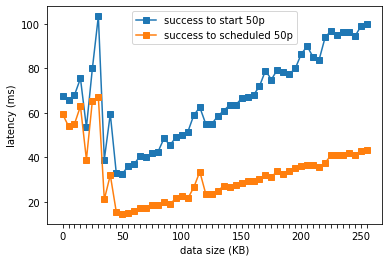

In [37]:
payload_sizes = list(data.keys())
fig, ax = plt.subplots()

ax.plot(payload_sizes, aggregate['success to start 50p'] , marker='s', label='success to start 50p')
# ax.plot(payload_sizes, aggregate['success to start 99p'] , marker='s', label='dynamodb 99p')
ax.plot(payload_sizes, aggregate['success to scheduled 50p'] , marker='s', label='success to scheduled 50p')
# ax.plot(payload_sizes, aggregate['success to scheduled 99p'] , marker='s', label='dynamodb 99p')


ax.set(xlabel='data size (KB)',ylabel='latency (ms)')

ax.legend()
for idx, label in enumerate(ax.xaxis.get_ticklabels()):
    if int(payload_sizes[idx]) % 50 != 0:
        label.set_visible(False)